# WQU Capstone project - Short-term trading strategy on G10 currencies
## Notebook three.one - Prepare Interest Rate Differential Data

* Sergey Chigrinov - chigrinov.s.88@gmail.com
* Dhruv Agrawal -  dhruva1@stanfordalumni.org
* Man Sing Ho - mshoalbert@gmail.com

### Jun-Aug-2020

In this notebook we prepare interest rate and its differential data.

Data is downloaded from various source and consolidated manually using Excel. Data includes:
1. AUD - Bank Bill Swap Rate (BBSW) 3M - From RBA website
2. NZD - Bank Bill Yield (BKBM) 3M - From RBNZ website
3. USD - LIBOR 3M - From Federal Reserve Bank of St. Louis
4. GBP - LIBOR 3M - From Federal Reserve Bank of St. Louis
5. JPY - LIBOR 3M - From Federal Reserve Bank of St. Louis
6. EUR - LIBOR 3M - From Federal Reserve Bank of St. Louis
7. CAD - Canadian Deposit Offer Rate (CDOR) 3M / Banker Acceptance (BA)

In this notebook we are using AUD/USD pair for demostration.

In [13]:
import sys
import os
#insert you own path or use relative path
path_to_project = os.path.realpath('..') 
sys.path.append(path_to_project)

In [14]:
import pandas as pd
import numpy as np
import datetime as dt
from multiprocessing import cpu_count
import warnings
warnings.filterwarnings('ignore')

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-talk')
plt.style.use('bmh')

In [57]:
ticker = 'AUD/USD'

CCY1 = ticker[:3]
CCY2 = ticker[-3:]

print("CCY1: " + CCY1)
print("CCY2: " + CCY2)

input_path_ir_data = os.path.join(path_to_project, 'input_data', 'interbank_IR_3m.xlsx')
ir = pd.read_excel(input_path_ir_data,sheetname = 'consolidatedData')
ir.index =[dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in ir.date]

CCY1: AUD
CCY2: USD


In [58]:
ir.head(10)

,date,AEST,NZST,LDNT,EDT,AUD,NZD,USD,GBP,EUR,JPY,CAD
2014-06-22 23:00:00,2014-06-22 23:00:00,2014-06-23 09:00:00,2014-06-23 11:00:00,2014-06-23 00:00:00,2014-06-22 19:00:00,2.70,3.57,0.2306,0.55438,0.17643,0.13286,1.2
2014-06-23 01:00:00,2014-06-23 01:00:00,2014-06-23 11:00:00,2014-06-23 13:00:00,2014-06-23 02:00:00,2014-06-22 21:00:00,2.71,3.57,0.2306,0.55438,0.17643,0.13286,1.2
2014-06-23 03:00:00,2014-06-23 03:00:00,2014-06-23 13:00:00,2014-06-23 15:00:00,2014-06-23 04:00:00,2014-06-22 23:00:00,2.71,3.57,0.2306,0.55438,0.17643,0.13286,1.2
2014-06-23 05:00:00,2014-06-23 05:00:00,2014-06-23 15:00:00,2014-06-23 17:00:00,2014-06-23 06:00:00,2014-06-23 01:00:00,2.71,3.57,0.2306,0.55438,0.17643,0.13286,1.2
2014-06-23 07:00:00,2014-06-23 07:00:00,2014-06-23 17:00:00,2014-06-23 19:00:00,2014-06-23 08:00:00,2014-06-23 03:00:00,2.71,3.57,0.2306,0.55438,0.17643,0.13286,1.2
2014-06-23 09:00:00,2014-06-23 09:00:00,2014-06-23 19:00:00,2014-06-23 21:00:00,2014-06-23 10:00:00,2014-06-23 05:00:00,2.71,3.57,0.2306,0.55438,0.17643,0.13286,1.2
2014-06-23 11:00:00,2014-06-23 11:00:00,2014-06-23 21:00:00,2014-06-23 23:00:00,2014-06-23 12:00:00,2014-06-23 07:00:00,2.71,3.57,0.2326,0.55250,0.17857,0.13286,1.2
2014-06-23 13:00:00,2014-06-23 13:00:00,2014-06-23 23:00:00,2014-06-24 01:00:00,2014-06-23 14:00:00,2014-06-23 09:00:00,2.71,3.57,0.2326,0.55250,0.17857,0.13286,1.2
2014-06-23 15:00:00,2014-06-23 15:00:00,2014-06-24 01:00:00,2014-06-24 03:00:00,2014-06-23 16:00:00,2014-06-23 11:00:00,2.71,3.57,0.2326,0.55250,0.17857,0.13286,1.2
2014-06-23 17:00:00,2014-06-23 17:00:00,2014-06-24 03:00:00,2014-06-24 05:00:00,2014-06-23 18:00:00,2014-06-23 13:00:00,2.71,3.57,0.2326,0.55250,0.17857,0.13286,1.2


Calculate interest rate differential in %

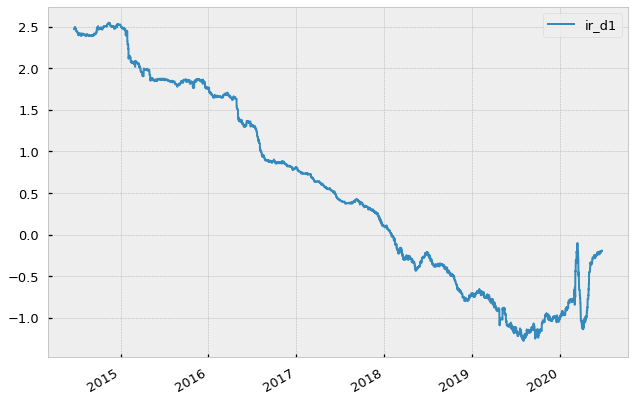

In [59]:
ir_d1 = pd.DataFrame(index=ir.index, columns=['ir_d1'])
ir_d1['ir_d1']= ir[CCY1] - ir[CCY2]
ir_d1.plot()